# Tutorial for FHDpy

Credits: Henrique Ennes (https://hlovisiennes.github.io/).

In [1]:
import FHDpy.FHD as FHD
from FHDpy.SLP import SLP as SLP

This notebook deals with the data structure for Heegaard diagrams described in [arxiv preprint](https://arxiv.org/abs/2507.11406). We strongly advise the reader to first check `TutorialSLP.ipynb`, as many methods of that module will be implicitly or explicitly used here.

## Introduction

The main idea of `FHDpy` is to give us a data structure to represent closed 3-manifolds that is significantly more compact (in fact, sometimes exponentially) than the usual representation of 3-manifolds using **triangulations**.  For such, we will use Heegaard splittings. In a snipshot, a **Heegaard splitting** is given by a pair $(\Sigma_g, \phi)$, where $\Sigma_g$ is the (unique up to homeomorphism) closed surface of genus $g$ and $\phi$ is a homeomorphism from $\Sigma_g\to\Sigma_g$, often restrcited to the mapping class group of $\Sigma_g$, $\text{Mod}(\Sigma_g)$, i.e., considered only up to isotopies. One can imagine obtaining the 3-manifold by gluing two handlebodies of boundary $\Sigma_g$ using $\phi$ as a gluing map. In particular, we can always assume that $\phi$ is a word in some finite alphabet consisting of Dehn twists about Lickorish generators and can be thus described as a data structure.

The `Twister` module of `SnapPy` allows for getting a triangulation out of a Heegaard splitting of a 3-manifold. For example, it is a well-known fact that the 3-sphere $S^3$ has a Heegaard splitting for $g=1$ (i.e., $\Sigma_g$ is the torus) with $\phi = b$ where $b$ represents the Dehn twist about one of the two Lickorish generators of the torus, in this case, the meridian of the torus (the purple curve in the image below).

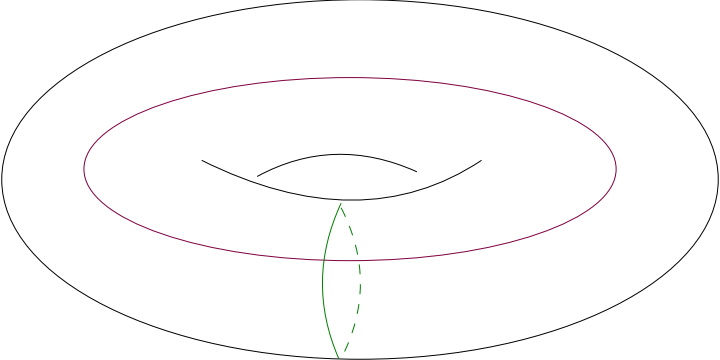

In [2]:
import snappy
torus = snappy.twister.Surface('S_1')
gluing = 'b'
manifold = torus.splitting(gluing= gluing, handles= 'a*A')

We can check that this, indeed, represents a sphere by computing its fundamental group (which, by the Poincaré conjecture, proved by Perelman, is the only 3-manifold with trivial fundamental group).

In [3]:
manifold.fundamental_group()

Generators:
   
Relators:
   

The topological information of a Heegaard splitting can be also given as **Heegaard diagram**, consisting of a tuple $(\Sigma_g, \alpha, \beta)$ where $\alpha$ and $\beta$ are two curves in $\Sigma_g$ surface such that $\phi(\alpha)=\beta$. In terms of data structure, we assume that

1. $\Sigma_g$ is given by a 2-complex $T$.
2. $\alpha$ are $g$ curves in the edges of $T^{(1)}$ which may only intersect at vertices. We call the $\alpha$ curves edged (as they lie in the edges of the complex).
3. $\beta$ are $g$ SLPs describing the signed intersection sequences with each of the eges of $T$. We call the $\beta$ curves edged (as they lie in the edges of the complex).

For example, the following is a diagram of $S^3$ over the torus (in fact, it is a diagram of the same spltting described above). Here the unique $\alpha$ curve is shown in red, the unique $\beta$ curve in blue, and the edges of the complex (here a rectangle) representing the torus are all in black.

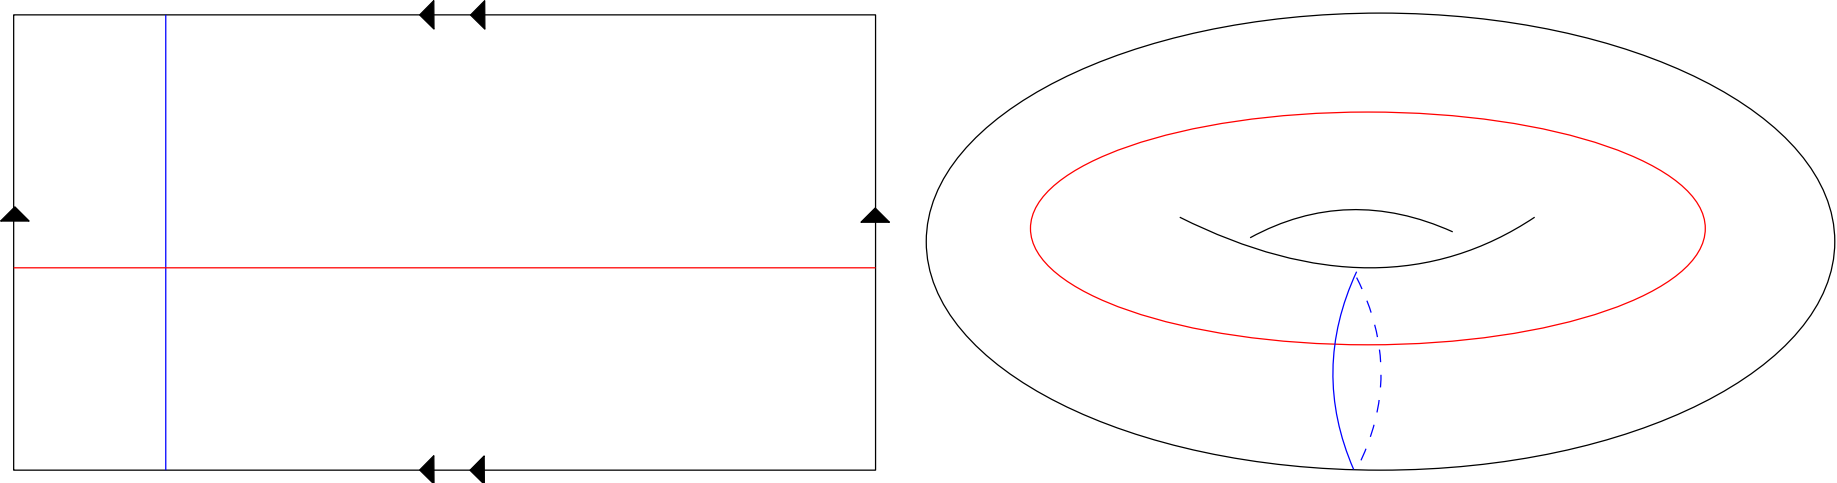

## Diagrams over the torus
In FHD, we can represent this same diagram in two ways, `FHD_genus1` and `FHDLong`. As the name indicates, although `FHDLong` can be used to find Heegaard diagrams of 3-manifolds over general surfaces, `FHD_genus1` can be used only to represent 3-manifolds that have splittings over the torus (also known as lens spaces). Starting with the more general one, `FHDLong`, it allows one to express the cellular complex for $\Sigma_g=T^2$. This syntax assumes four mandatory arguments and one optional. The mandatory are:

1. The $\alpha$ curves in standard form, that is, slightly displaced from the edges of the complex. In the current version, these need to be computed by hand from the complex. We assume that they are given as SLPs. Each of the curves is assumed to be a key in a dictionary whose values are the SLP of the intersection sequence.

2. The $\alpha$ curves as edges of the complex. Each of the curves is assumed to be a key in a dictionary whose values are the list of edges.

3. The $\alpha$ curves in standard form, that is, slightly displaced from the edges of the complex. In the current version, these need to be computed by hand from the complex. We assume that they are given as SLPs. Each of the curves is assumed to be a key in a dictionary whose values are the SLP of the intersection sequence.

4. The Lickorish generators as edges of the complex. Each of the curves is assumed to be a key in a dictionary whose values are the list of edges.

and finally, the optional $\beta$ curves, which are necessarily standard. Again, we assume that they are given as SLPs.

In [4]:
alpha_curves_standard = {'a': SLP(['b*'])}
alpha_curves_edges = {'a': ['a']}
generators_standard = {'a': SLP(['b']), 'b': SLP(['a*'])}
generators_edge = {'a':['a'], 'b':['b']}
beta = [SLP(['a'])]

# This creates the diagram itself.
fhd = FHD.FHDLong(alpha_curves_standard, alpha_curves_edges, generators_standard, generators_edge, beta = beta)

Again, we can check if this is a sphere by computing its fundamental group. 

In [5]:
print(fhd.fundamental_group())

Generators:
x0

Relators:
x0


Althogh it might not seem obvious of first, this represents the same fundamental group computed through `snappy`: it has one generator, $x_0$ and one relation, $x_0=e$, the identity element of the group. That is, the group is trivial, as expected.

The syntax of `FHD_genus1` is significantly simpler, but also more restrictive.

In [6]:
genus1 = FHD.FHD_genus1()
print('Relators: ', genus1.fundamental_group())

Relators:  0. c*
1. #0


Notice that, here the output is a little different as it does not belong to the finte presentation group class (FPG). Instead, it is an SLP of the unique group relation. Nontheless, this SLP also gives the same fundamental group: it sets the unique group generator, $c^{-1}$ to the identity.

More complex diagrams can be generated using mapping classes.

In [7]:
genus1 = FHD.FHD_genus1()
gluing = 'bAbaa' # This can be changed by the user to experiment with distinct 3-manifolds.
genus1.dehn_twist(gluing)

manifold = torus.splitting(gluing = gluing, handles= 'a*A')

We can check our code by computing the associated homology computed using both `snappy` and our techniques.

In [8]:
print('Homology from FHDpy: ', genus1.homology())
print('Homology from snappy: ', manifold.homology())

Homology from FHDpy:  Z/3
Homology from snappy:  Z/3


In fact, we can even compare these two computations with a theoretical value arriving from the modular representation of the mapping class group of the torus. 

In [9]:
FHD.modular_representation(gluing)

Z/3

Refer to `ExperimentsWithFHD.ipynb` for a discussion of the numerical stability of each of these techniques.

Differently from `snappy`, `FHD` supports gluing words in power-notation form. For example, the word $bbaaa$ can be written as $b^2a^3$ and used to define a gluing. 

In [10]:
gluing = 'b^2a^3'
fhd.reset()
fhd.dehn_twist(gluing)
print('Homology: ', fhd.homology())

Homology:  Z/2


Finally, we notice that the variable $\texttt{genus1}$ SLP of the diagram's curves and so all SLP functionalities can be applied to it.

In [11]:
genus1.list_form

['b',
 'c',
 'a',
 '#0.#1',
 '#3.#2',
 'b',
 'c',
 '#4',
 '#5.#6',
 '#8.#7',
 'c*',
 '#9*',
 'b',
 '#10.#11',
 '#13.#12',
 'c*',
 '#14*',
 '#9',
 '#15.#16',
 '#18.#17',
 'c*',
 '#19*',
 '#14',
 '#20.#21',
 '#23.#22',
 '#24*',
 'c*',
 '#25.#26']

## Diagrams over the double torus

The same syntax can be used to generate Heegaard diagrams over the double torus. 
`FHD` is cellular complex-agnostic, but in all experiments with $\Sigma_2$ we use the following complex
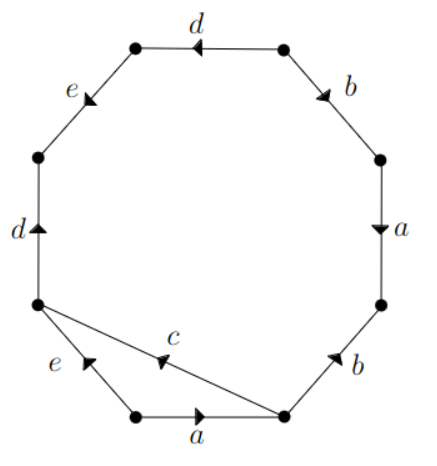

Here, the $\alpha$ curves are $a$ and $e$, whereas the initial $\beta$ curves (no gluing) are $b$ and $d$. Notice that $c$ is separating ont $\Sigma_2$, although it is one of the usual Lickorish generators of this surface.

In [12]:
# Cellular structure of the double torus, see the diagram above.
alpha_curves_standard = {'a': SLP(['b']), 'e': SLP(['d*'])}
alpha_curves_edges = {'a':['a'], 'e':['e']}
generators_standard = {'a': SLP(['b*']), 
                       'b': SLP(['c*','a','#0.#1']), 
                       'c': SLP(['b','d','#0.#1']),
                       'd': SLP(['c*','e*','#0.#1']), 
                       'e': SLP(['d'])}
generators_edge = {'a':['a'], 'b':['b'], 'c':['c'], 'd':['d'], 'e':['e']}


Again, the syntax is very similar.

In [13]:
gluin = 'aBcDea^2b^4'
fhd = FHD.FHDLong(alpha_curves_standard, alpha_curves_edges, generators_standard, generators_edge)
fhd.dehn_twist(gluing)
print('Homology: ', fhd.homology())
print('\n\nFundamental group:\n\n', fhd.fundamental_group())

Homology:  Z/2 + Z


Fundamental group:

 Generators:
x0, x1, x2, x3, x4, x5, x6, x7, x8, x9

Relators:
x2*.x0, x3*.x1, x4*.x2, x5*.x4, x6*.x5, x7*.x6, x8*.x7.x7, x9*.x8, x9


We note that, differently from the torus case, there is no simpler way to represent a splitting over $\Sigma_2$, except for FHDLong.